### IMDB dataset Embeddings

This notebook will help to explore the data set `imdb`: in particular it will try to explore the difference Vector feature and Embeddings

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sentimental_hwglu.naive_sa import NaiveSA
from sentimental_hwglu.utils import *
from sentimental_hwglu.words_statistics import WordStatistics
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD as PCA
from sklearn.preprocessing import StandardScaler

from gensim.models import KeyedVectors
from gensim import models

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
import re


In [3]:
data_directory = None

#### Load Data

In [4]:
if data_directory is None:
    print("Project directory: ")
    data_directory = input()

Project directory: 


In [5]:
project = Project(data_directory)
df = loadIMDBdataset(filename=project.csv_filename_extened)
n_reviews = len(df.reviews)

In [6]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
sc = StandardScaler(with_mean=False)
pca = PCA(n_components=2)

In [7]:
# pos_vecs = tfidf.fit_transform(df.stamm_no_punctuation[df.sentiment == 1])
# neg = tfidf.fit_transform(df.stamm_no_punctuation[df.sentiment == 0])


In [8]:
X = tfidf.fit_transform(df.stamm_no_punctuation)
X_sc = sc.fit_transform(X)
# X_sc = X
X_pca = pca.fit_transform(X_sc)


(0.0, 25.0)

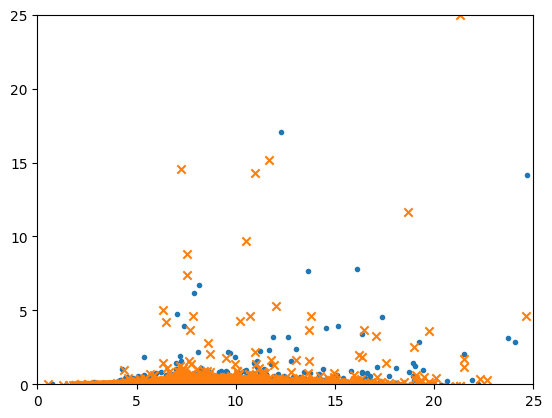

In [9]:
plt.scatter(
    x=X_pca[df.sentiment == 1, 0],
    y=X_pca[df.sentiment == 1, 1],
    marker='.',
    # alpha=0.3
)
plt.scatter(
    x=X_pca[df.sentiment == 0, 0],
    y=X_pca[df.sentiment == 0, 1],
    marker='x',
    # alpha=0.3,
)
plt.xlim([0, 25])
plt.ylim([0, 25])

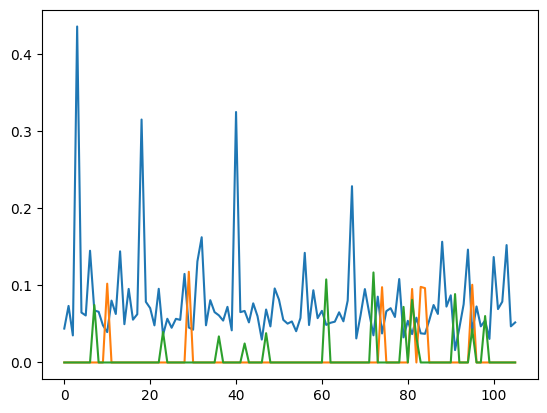

In [10]:
for k in [0, 1000, 10000]:
    data = np.squeeze(np.asarray(X[k][X[0] > 0]))
    x = range(len(data))
    y = data
    plt.plot(x, y)


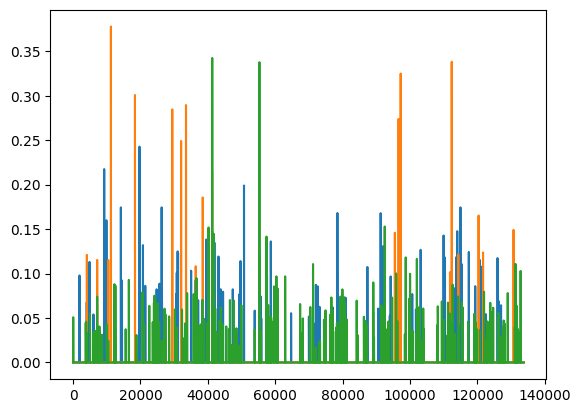

In [11]:
for k in range(3):
    x = np.squeeze(np.asarray(X[df[df.sentiment == 0].index[k]].toarray()))
    plt.plot(x)

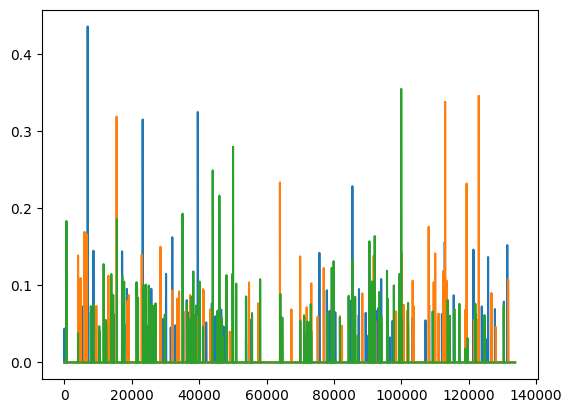

In [12]:
for k in range(3):
    x = np.squeeze(np.asarray(X[df[df.sentiment == 1].index[k]].toarray()))
    plt.plot(x)

In [13]:
from sentimental_hwglu.utils import progressbar
y_threshold = 0
x_m_p, y_m_p = [], []
x_m_n, y_m_n = [], []
pos = df[df.sentiment == 1]
neg = df[df.sentiment == 0]
n_tot = len(df)
for k in range(n_tot):
    progressbar(k, n_tot, 'creating max Tf-Id vector: ')
    try:
        v = np.squeeze(np.asarray(X[pos.index[k]].toarray()))
        x = np.argmax(v)
        y = v[x]
        if y >= y_threshold:
            x_m_p.append(x)
            y_m_p.append(y)
    except: pass

    try:
        v = np.squeeze(np.asarray(X[neg.index[k]].toarray()))
        x = np.argmax(v)
        y = v[x]
        if y >= y_threshold:
            x_m_n.append(x)
            y_m_n.append(y)
    except: pass

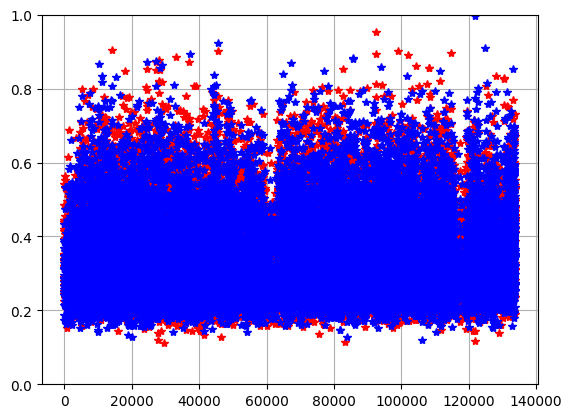

In [14]:
plt.plot(x_m_p, y_m_p, 'r*')
plt.plot(x_m_n, y_m_n, 'b*')
plt.ylim([0, 1])
plt.grid()

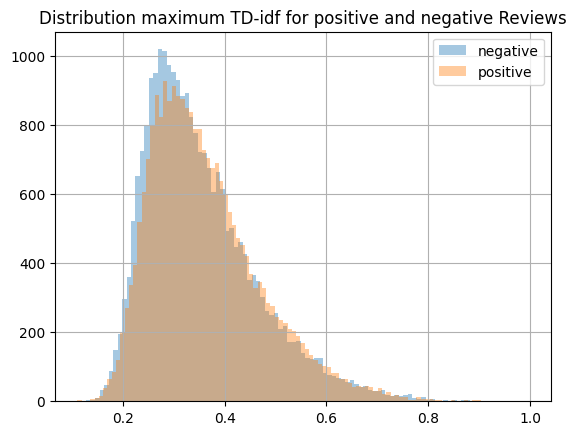

In [15]:
plt.title("Distribution maximum TD-idf for positive and negative Reviews")
plt.hist(y_m_n, bins=100, alpha=0.4, label='negative')
plt.hist(y_m_p, bins=100, alpha=0.4, label='positive')
plt.legend()
plt.grid()

sentiment:  1   reviews                   this royal rumble basically had the message of...
sentiment                                                                 1
emoticons                                                               NaN
reviews_no_punctuation    this royal rumble basically had the message of...
reviews_no_stopwords      royal rumble basically message wrestling days ...
length                                                                 1654
words                                                                   354
sentences                                                                26
positive_emoticons                                                        0
negative_emoticons                                                        0
stamm                     thi royal rumbl basic messag wrestl day . gimm...
stamm_no_stopwords        royal rumbl basic messag wrestl day gimmick im...
stamm_no_punctuation      thi royal rumbl basic messag wrestl day gimmic

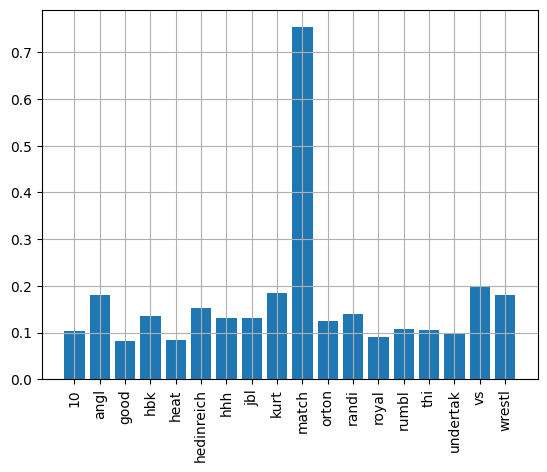

In [16]:
for n, k in enumerate(df.reviews):
    if n < 2000: continue
    if k.find('good') >= 0 and df.sentiment.iloc[n] == 1:
        x = np.squeeze(np.asarray(X[n].toarray()))
        if max(x) < 0.7: continue
        print("sentiment: ", df.sentiment.iloc[n], " ", df.iloc[n])
        x_nz = []
        y_nz = []
        n_tot = len(x)
        for index, value in enumerate(x):
            progressbar(index, n_tot)
            if value > 0.08:
                x_nz.append(tfidf.get_feature_names_out()[index])
                y_nz.append(value)
        plt.bar(x_nz, y_nz)
        plt.xticks(rotation=90)
        plt.grid()
        break

In [17]:
Z_p = [(x, y) for y,x in sorted(zip(y_m_p,x_m_p), reverse=True)]
Z_n = [(x, y) for y,x in sorted(zip(y_m_n,x_m_n), reverse=True)]

In [18]:
print("Positive: ")
for k in range(30):
    print(Z_p[k], tfidf.get_feature_names_out()[Z_p[k][0]])

print("Negative: ")
for k in range(30):
    print(Z_n[k], tfidf.get_feature_names_out()[Z_n[k][0]])

print("================= Reverse ===============")

print("Positive: ")
for k in range(1, 30):
    k = -k
    print(Z_p[k], tfidf.get_feature_names_out()[Z_p[k][0]])

print("Negative: ")
for k in range(1, 30):
    k = -k
    print(Z_n[k], tfidf.get_feature_names_out()[Z_n[k][0]])

Positive: 
(92526, 0.953712437840043) pokemon
(14030, 0.9056484169129976) blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah
(45626, 0.9030002797563405) ghouli
(98958, 0.9027276723355384) robot
(114713, 0.8950231147272574) tarzan
(92526, 0.8925442228013127) pokemon
(101897, 0.8918206475877798) scanner
(33080, 0.8863846393318899) doodlebop
(28100, 0.8762516501622339) cycl
(37042, 0.8728913073325537) ernest
(27252, 0.8727796890960278) critter
(104412, 0.8619567297750563) shark
(108188, 0.8546839123978799) smallvil
(108188, 0.8546839123978799) smallvil
(82687, 0.8519194726013145) muppet
(24626, 0.8518112894479722) columbo
(27252, 0.8508984808485542) critter
(28446, 0.8496723135266943) dalmat
(18093, 0.8481675265300374) bye
(127926, 0.8340626742366107) wei
(130576, 0.8275359018541195) wirey
(130436, 0.8247934115579271) wine
(28131, 0.8210995782970852) cypher
(111331, 0.8195013907471136) stepford
(28088, 0.817426857263772) cybersix
(28866, 0.8168561578791672) dariu
(92

In [20]:
word2vec = loadGoogleW2v(project)

In [21]:
means = []
n_words, n_invalid = 0, 0
n_tot = len(df.reviews)
words_set = set()
for k in range(n_tot):
    m = np.zeros(word2vec['hello'].shape)
    progressbar(k, n_tot)
    words = df.stamm_no_punctuation.iloc[k].split(' ')
    n_add = 1
    for n, w in enumerate(words):
        n_words += 1
        try: 
            m += word2vec[w] 
            n_add += 1
        except: 
            n_invalid += 1
            words_set.add(w)
    m = m / n_add
    means.append(m)

print(" could not find ", n_invalid, " out of ", n_words, "(", 100.0 * n_invalid / n_words, "%)")

 could not find  1401571  out of  6434164 ( 21.78326508307839 %)


In [22]:
# words_set

In [23]:
pca_w2v = PCA(n_components=3)
X_pca_w2v = pca_w2v.fit_transform(X_sc)

In [24]:
# print(X_pca[df.sentiment == 1, 1])
# print(X_pca_w2v[df.sentiment == 1, 1])
# print(np.max((X_pca_w2v - X_pca)**2))
# plt.plot(X_pca_w2v[df.sentiment == 1, 1] - X_pca[df.sentiment == 1, 1])
# plt.plot(X_pca_w2v[df.sentiment == 0, 1] - X_pca[df.sentiment == 0, 1])
# plt.plot(X_pca_w2v[df.sentiment == 1, 0] - X_pca[df.sentiment == 1, 0])
# plt.plot(X_pca_w2v[df.sentiment == 0, 0] - X_pca[df.sentiment == 0, 0])

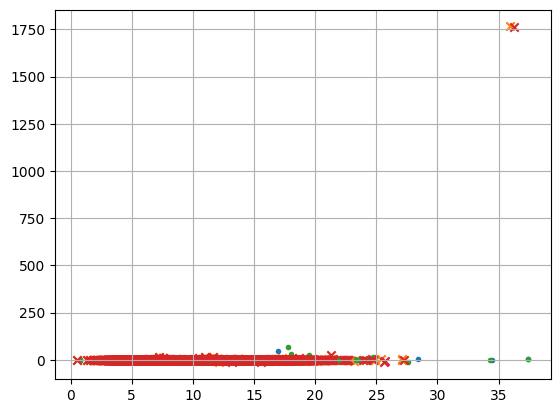

In [25]:
plt.scatter(
    x=X_pca_w2v[df.sentiment == 1, 0],
    y=X_pca_w2v[df.sentiment == 1, 1],
    marker='.',
    # alpha=0.k
)
plt.scatter(
    x=X_pca_w2v[df.sentiment == 0, 0],
    y=X_pca_w2v[df.sentiment == 0, 1],
    marker='x',
    # alpha=0.3,
)
# plt.xlim([0, 25])
# plt.ylim([0, 25])

plt.scatter(
    x=X_pca[df.sentiment == 1, 0],
    y=X_pca[df.sentiment == 1, 1],
    marker='.',
    # alpha=0.3
)
plt.scatter(
    x=X_pca[df.sentiment == 0, 0],
    y=X_pca[df.sentiment == 0, 1],
    marker='x',
    # alpha=0.3,
)

plt.grid()

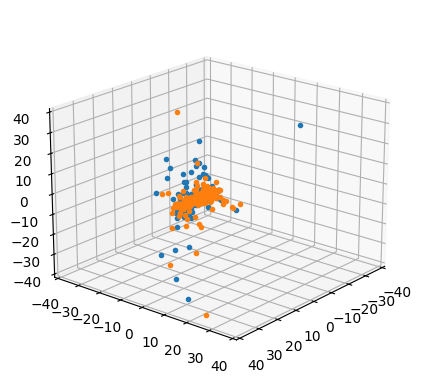

In [26]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(
    X_pca_w2v[df.sentiment == 1, 0],
    X_pca_w2v[df.sentiment == 1, 1],
    X_pca_w2v[df.sentiment == 1, 2],
    '.'
)
ax.plot3D(
    X_pca_w2v[df.sentiment == 0, 0],
    X_pca_w2v[df.sentiment == 0, 1],
    X_pca_w2v[df.sentiment == 0, 2],
    '.'
)
ax.set_xlim3d([-40, 40])
ax.set_ylim3d([-40, 40])
ax.set_zlim3d([-40, 40])
ax.view_init(20, 40)

In [27]:

df_w_common = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_common.csv'), sep=';', index_col=False)
df_w_pos = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_only_pos.csv'), sep=';', index_col=False)
df_w_neg = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_only_neg.csv'), sep=';', index_col=False)
df_w_common_stamm = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_stamm_common.csv'), sep=';', index_col=False)
df_w_pos_stamm = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_stamm_only_pos.csv'), sep=';', index_col=False)
df_w_neg_stamm = pd.read_csv(os.path.join(project.basedir, 'datasets/words/frequencies_words_stamm_only_neg.csv'), sep=';', index_col=False)

In [28]:
n_words = 10
words_stamm_cpos = list(df_w_common_stamm.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])
words_stamm_cneg = list(df_w_common_stamm.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_negative', ascending=False).head(n_words).values[:, 0])
words_cpos = list(df_w_common.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])
words_cneg = list(df_w_common.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_negative', ascending=False).head(n_words).values[:, 0])
words_pos = list(df_w_pos.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])
words_neg = list(df_w_neg.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])
words_stamm_pos = list(df_w_pos_stamm.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])
words_stamm_neg = list(df_w_neg_stamm.sort_values('count_use', ascending=False).head(n=1000).sort_values('fraction_positive', ascending=False).head(n_words).values[:, 0])

In [29]:
words_common = list(df_w_common.values[:, 0])

In [30]:
words = words_pos + words_neg + words_cpos + words_cneg
words = words_cpos + words_cneg

In [31]:
# words = ['good', 'bad', 'nice']
found_words = []
data = []
for w in words + words_common:
    try: 
        data.append(word2vec[w])
        found_words.append(w)
    except: pass # print(" words ", w, " not found")
pca_w2v = PCA(n_components=2)
x = pca_w2v.fit_transform(data)

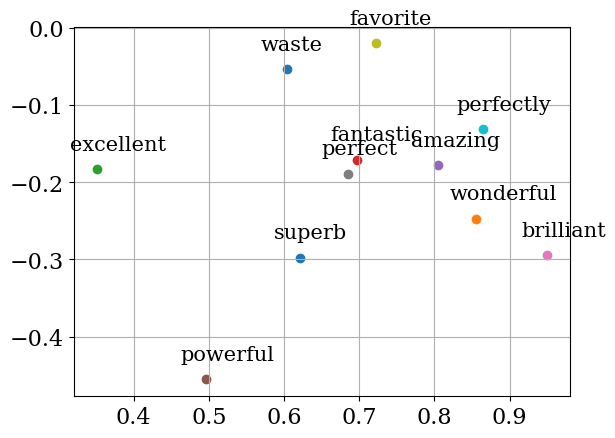

In [41]:
import matplotlib
font = {
    'size'   : 16,
    'family': 'serif'
    }
matplotlib.rc('font', **font)
for n, w in enumerate(found_words[:11]):
    plt.scatter(
        x[n, 0],
        x[n, 1],
    )
    # if w in ['wasted', 'powerful', 'perfect', 'mess']:
    #     if w in words: plt.text(x[n, 0] - 0.025, x[n, 1] + 0.045, w)
    # else:
    #     if w in words: plt.text(x[n, 0] - 0.025, x[n, 1] - 0.045, w)
    if w in words: plt.text(x[n, 0] - 0.035, x[n, 1] + 0.025, w, fontsize=15)
plt.grid()